# Music & Mental Health Survey Results
#### Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

#### However, MT employs a wide range of different genres, varying from one organization to the next.

#### The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

## Dataset Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("sample_data/mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
df.info()
df.dtypes
#Columns like Age and BPM are float64, but should be int64 (but first I'd have to get rid of the missing data).
#As you can see, most of the columns are String, which I'm changing to Category.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

,0
Timestamp,object
Age,float64
Primary streaming service,object
Hours per day,float64
While working,object
Instrumentalist,object
Composer,object
Fav genre,object
Exploratory,object
Foreign languages,object


In [ ]:
df.drop(columns=['Timestamp', 'Permissions'], inplace=True) #The Timestamp and Permissions columns do not affect the analysis as they are just a formality, so they can be removed.

In [ ]:
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda col : col.astype("category"))
#To avoid repeating the code, I will select the indexes of columns with
#the object type and convert them to columns using a function that changes the type to category

## Handling missing data

In [ ]:
df.isna().mean() * 100

,0
Age,0.135870
Primary streaming service,0.135870
Hours per day,0.000000
While working,0.407609
Instrumentalist,0.543478
Composer,0.135870
Fav genre,0.000000
Exploratory,0.000000
Foreign languages,0.543478
BPM,14.538043


As you can see, we have:

Age < 1%
Primary streaming service < 1%
While working < 1%
Instrumentalist < 1%
Composer < 1%
Foreign languages < 1%
BPM ~ 14%
Music effects ~ 1%

In [ ]:
df_backup = df.copy()

In [ ]:
df['Age'].isna().sum()

np.int64(1)

#### Age - I am removing records with missing age because the value is missing only in 1 record and it is important for us in the analysis

In [ ]:
df.dropna(subset=['Age'], inplace=True)

In [ ]:
df.groupby('Primary streaming service', observed=True)['Primary streaming service'].count()

,Primary streaming service
Primary streaming service,
Apple Music,51
I do not use a streaming service.,71
Other streaming service,50
Pandora,11
Spotify,457
YouTube Music,94


In [ ]:
df['Primary streaming service'] = df['Primary streaming service'].fillna('Spotify')

In [ ]:
df['While working'].mode()[0]

'Yes'

While working - I fill in the value Yes because it occurs most often and is more realistic for many people

In [ ]:
df['While working'] = df['While working'].fillna('Yes')

In [ ]:
df.groupby(['Instrumentalist', 'Composer'], observed=True)['Composer'].count()

Instrumentalist  Composer
No               No          463
                 Yes          33
Yes              No          143
                 Yes          92
Name: Composer, dtype: int64

Instrumentalist, Composer - I will fill in the value No, because more often than not a person does not make their own music and does not play instruments

In [ ]:
df['Composer'] = df['Composer'].fillna('No')
df['Instrumentalist'] = df['Instrumentalist'].fillna('No')

Foreign languages ​​- will be filled using the Backward fill method

In [ ]:
df['Foreign languages'] = df['Foreign languages'].bfill()
df['Foreign languages'].isna().sum()

np.int64(0)

BPM - due to the high percentage it will try to fill by median


In [ ]:
median_BPM = df['BPM'].median(skipna=True)
df['BPM'] = df['BPM'].fillna(median_BPM)

Music effects - in order not to lose the number of records, we can assume that the missing values ​​are No effect

In [ ]:
df['Music effects'] = df['Music effects'].fillna('No effect')

In [ ]:
df.isna().mean() * 100

,0
Age,0.0
Primary streaming service,0.0
Hours per day,0.0
While working,0.0
Instrumentalist,0.0
Composer,0.0
Fav genre,0.0
Exploratory,0.0
Foreign languages,0.0
BPM,0.0


Now that there are no missing values, you can swap the data type in the Age and BPM columns.

In [ ]:
df['Age'] = df['Age'].astype('int64')
df['BPM'] = df['BPM'].astype('int64')

## Outliers

In [ ]:
bpm_box = px.box(df, y="BPM", width=500, height=400)
print(f'Average BPM: : {df["BPM"].mean()}')
iplot(bpm_box)

Average BPM: : 1360666.9782312925


#### We have outliers in the BPM column, so I'll use the IQR-based Outlier Detection method.

In [ ]:
def remove_outlier(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)

  IQR = Q3 - Q1
  max_value = Q3 + 1.5 * IQR
  min_value = Q1 - 1.5 * IQR

  return column.apply(lambda v: min_value if v < min_value else max_value if v > max_value else v)

In [ ]:
df['BPM'] = remove_outlier(df['BPM'])
df['BPM'] = df['BPM'].astype('int64') #cast into int because we dont need floating value

In [ ]:
bpm_box = px.box(df, y="BPM", width=500, height=400)

print(f'Average BPM: {df["BPM"].mean()}')
iplot(bpm_box)

Average BPM: 122.55102040816327


In [ ]:
hours_box = px.box(df, y="Hours per day", width=500, height=400)
iplot(hours_box)

Looking at the maximum value from the Hours per day column, it is doubtful that anyone could listen to music for that long, so I think that, just like with BPM, we should use the IQR-based method and equalize the values


In [ ]:
df['Hours per day'] = remove_outlier(df['Hours per day'])
df['Hours per day'].describe()

,Hours per day
count,735.000000
mean,3.407551
std,2.409480
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,9.500000


Finished cleaning
Final result:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           735 non-null    int64   
 1   Primary streaming service     735 non-null    category
 2   Hours per day                 735 non-null    float64 
 3   While working                 735 non-null    category
 4   Instrumentalist               735 non-null    category
 5   Composer                      735 non-null    category
 6   Fav genre                     735 non-null    category
 7   Exploratory                   735 non-null    category
 8   Foreign languages             735 non-null    category
 9   BPM                           735 non-null    int64   
 10  Frequency [Classical]         735 non-null    category
 11  Frequency [Country]           735 non-null    category
 12  Frequency [EDM]               735 non-null    category


## EDA

#### General Characteristics of the Individuals
#### I will begin my analysis of the dataset with the general characteristics of the individuals surveyed.

In [ ]:
age_hist = px.histogram(df, x='Age', nbins=20)

age_charts = make_subplots(rows=2, cols=2, subplot_titles=['Age', 'Hours per day', 'Hours per day by Age'])

age_charts.add_trace(go.Histogram(x=df['Age'], name='Age', nbinsx=20),row=1,col=1)
age_charts.add_trace(go.Histogram(x=df['Hours per day'], name='Hours per day', nbinsx=10, ),row=1,col=2)

age_charts.add_trace(go.Histogram(x=df['Age'], y=df['Hours per day'], name='age vs hours', histfunc='avg', nbinsx=20),row=2,col=1)
age_charts.update_xaxes(title_text="Age", row=2, col=1)
age_charts.update_yaxes(title_text="Mean listen time", row=2, col=1)

age_charts.update_layout(showlegend=False, height = 650,width = 800)

iplot(age_charts)

#### Age

The vast majority are young people aged 15-25.

The average time spent listening to music per day ranges from 1 to 5 hours.

Music listening time decreases with age, although older people (80-85 years old) spend the most time listening to music.

In [ ]:
person_info = df[['Instrumentalist','Composer','While working', 'Exploratory', 'Foreign languages']]

figure = make_subplots(rows=2, cols=3, subplot_titles=person_info.columns)

for i, col_name in enumerate(person_info.columns):
  row = i // 3 + 1
  column = i % 3 + 1
  figure.add_trace(
    go.Histogram(x=person_info[col_name],name=col_name),
    row=row, col=column)

figure.update_layout(title='Histogram of Features', showlegend=False, height=600, width=800)

#### Features
The charts show that most people don't engage in music, they just listen to it.

A significant number of people listen to music while working and are constantly searching for new genres of music, often in foreign languages.

In [ ]:
streaming_services = df['Primary streaming service'].value_counts().reset_index()
streaming_services.columns = ['service', 'count']

services_pie = px.pie(streaming_services,values='count',names='service',title='Popularity of streaming services',hole=0.2,height=400,width=600)

age_services_hist = px.histogram(df,x='Primary streaming service',y='Age',histfunc='avg',title='Age-based streaming service usage statistics', height=500,width=600)

age_services_hist.update_layout(yaxis=dict(tickformat='d'))

iplot(services_pie)
iplot(age_services_hist)

#### Music
Streaming Services
Expectations: Spotify dominates among music listening services.

Interestingly, more people don't use any service than use Apple Music.

The average age of Spotify users is 23, and after 30, they tend to choose niche services or not use them at all

In [ ]:
fav_genres = df.groupby('Fav genre', observed=True).size().reset_index(name='count')

genres_pie = px.pie(fav_genres,values='count',names='Fav genre',hole=0.2,title='The most popular genre of music',height=500,width=800)

iplot(genres_pie)

#### Music Genres
Rock, Pop, and Metal dominate the most popular genres

In [ ]:
genre_age_chart = px.scatter(df,x='Fav genre',y='Age',color='Fav genre',title='Favorite music genres by age',labels={'Fav genre': '', 'Age': 'Age'},height=550,width=800)

genre_age_chart.update_traces(marker_size=8)
genre_age_chart.update_layout(showlegend=False)

iplot(genre_age_chart)

The age breakdown of genres looks fairly normal.

The oldest (89) respondent listens to rap (XD), while the youngest (10) listens to pop.

In [ ]:
avg_bpm = df.groupby('Fav genre', observed=True)['BPM'].mean().sort_values().reset_index()

genre_bpm_chart = px.scatter(avg_bpm,x='Fav genre',y='BPM',color='Fav genre',title='Average BPM when listening to specific music genres',labels={'Fav genre': '', 'BPM': 'BPM'}, height=550, width=800)

genre_bpm_chart.update_traces(marker_size=15)

genre_bpm_chart.update_layout(yaxis=dict(tickformat='d'))

iplot(genre_bpm_chart)

Average heart rate increases with the intensity of the music genre

In [ ]:
freq_df = df.filter(like='Frequency', axis=1)

freq_df = freq_df.melt(var_name='genre', value_name='frequency')
freq_df['genre'] = freq_df['genre'].str.replace('Frequency [', '').str.replace(']', '')

freq_hist = px.histogram(freq_df,x='genre',color='frequency',title='Frequency of listening to specific genres',)

freq_hist.update_xaxes(title='')
freq_hist.update_yaxes(title='Number of people')
freq_hist.update_layout(barmode='group', bargap=0.35, legend_title='Frequency')

iplot(freq_hist)

Listening frequency by genre
Almost everyone never listens to Gospel music.

Classical and Jazz are rarely listened to by the most people.

Pop is the most popular genre among those listened to occasionally.

Rock is the most frequently played genre.

In [ ]:
mental_illness = df[['Anxiety','Depression','Insomnia', 'OCD']]

illness_hists = make_subplots(rows=2, cols=2, subplot_titles=mental_illness.columns)

for i, col_name in enumerate(mental_illness.columns):
  row = i // 2 + 1
  column = i % 2 + 1
  illness_hists.add_trace(
    go.Histogram(x=mental_illness[col_name],name=col_name,nbinsx=20),
    row=row, col=column)

illness_hists.update_layout(title='Histogram of mental illnesses',showlegend=False,width=800,height=600)

Mental Illnesses
The most common mental illness is depression, along with anxiety disorders.

The least common is OCD (Obsessive-Compulsive Disorder).

In [ ]:
illness_age = make_subplots(rows=2, cols=2, vertical_spacing=0.2)

for i, col_name in enumerate(mental_illness.columns):
  row = i // 2 + 1
  column = i % 2 + 1
  illness_age.add_trace(
    go.Scatter(x=df['Age'], y=df[col_name], mode='markers'),
    row=row, col=column)
  illness_age.update_yaxes(row=row, col=column, title=col_name)


illness_age.update_xaxes(title='Age')
illness_age.update_traces(marker_size=5)
illness_age.update_layout(title='Level of individual diseases by age',showlegend=False,height=600,width=900)

iplot(illness_age)

Mental Illness and Age
According to the age distribution of mental illnesses, mental disorders are mostly suffered by young people

In [ ]:
illness_correlation = mental_illness.corr()

illness_heatmap = px.imshow(illness_correlation,
                text_auto=True,
                color_continuous_scale='Burgyl',
                title='Heatmap of correlations between diseases')

iplot(illness_heatmap)

Correlation between diseases
The correlation between diseases seems strange. If anxiety disorders are linked to depression, they have a lesser impact on (are linked to) insomnia.

OCD, however, has no significant correlation with other mental disorders.

In [ ]:
mental_illness = df[['Anxiety','Depression', 'OCD']]

insomnia_hists = make_subplots(rows=2, cols=2, horizontal_spacing=0.15, vertical_spacing=0.2)

for i, column_name in enumerate(mental_illness.columns):
    row = i // 2 + 1
    column = i % 2 + 1

    insomnia_hists.add_trace(go.Histogram(
        x=df['Insomnia'],
        y=mental_illness[column_name],
        histfunc='avg',
        nbinsx=10,
        name=column_name), row=row, col=column)

    insomnia_hists.update_xaxes(title_text="Level of insomnia", row=row, col=column)
    insomnia_hists.update_yaxes(title_text=f"Level {column_name}", row=row, col=column, range=[0,10])

insomnia_hists.update_layout(title='The impact of mental illness on sleep',showlegend=False,width=800,height=600)

iplot(insomnia_hists)

More detailed histograms of the impact of mental illness on insomnia show that the highest level of insomnia is found in people with a medium level of depression or anxiety disorder, which is very interesting.


In [ ]:
df['mean_mental_health'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']

Traits and Mental Health
For further analysis, I decided to create a new column in the dataset – the average level of mental health, where 0 is Healthy.

This column is created by adding up all the mental disorder columns.

According to the heatmap, the worst mental health condition is experienced by people aged ~19-25

In [ ]:
health_map = px.density_heatmap(df,x='Age',y='mean_mental_health',color_continuous_scale="Sunsetdark",labels={'Age': 'Age', 'mean_mental_health': 'Level'})

health_map.update_layout(title='Level of mental health problems in people by age',)

health_map.update_xaxes(title='Age')
health_map.update_yaxes(title='Mental health problems')

iplot(health_map)

Playing musical instruments or creating your own music does not significantly affect the level of mental illness

In [ ]:
musician_health = make_subplots(rows=1,cols=2, horizontal_spacing=0.3,subplot_titles=['Instrumentalist', 'Composer'])

musician_health.add_trace(
    go.Histogram(x=df['Instrumentalist'], y=df['mean_mental_health'], histfunc='avg'), row=1, col=1)
musician_health.add_trace(
    go.Histogram(x=df['Composer'], y=df['mean_mental_health'], histfunc='avg'), row=1, col=2)

musician_health.update_yaxes(title='Mental health problems')
musician_health.update_layout(showlegend=False,width=700,height=400)

The chart below shows the average prevalence of mental illness by frequency of listening to specific music genres.

The most frequently listened-to music genre that significantly impacts mental health is Jazz, followed by Metal, which dominates the category of music listened to occasionally.

In [ ]:
freq_means = pd.DataFrame()

frequency_mapping = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3}
frequency_name = {str(v): k for k, v in frequency_mapping.items()}

for i, col_name in enumerate(df.filter(like='Frequency', axis=1)):
  freq_mean = df.groupby(col_name, observed=True)['mean_mental_health'].mean().reset_index()
  freq_mean['genre'] = col_name.replace('Frequency [', '').replace(']', '')
  freq_mean['frequency'] = freq_mean[col_name].map(frequency_mapping)

  freq_means= pd.concat([freq_means, freq_mean])

freq_mean_health = px.scatter(freq_means, x='genre', y='mean_mental_health', color='frequency')
freq_mean_health.for_each_trace(lambda t: t.update(name = frequency_name[t.name]))

freq_mean_health.update_traces(mode='lines+markers', marker_size=10)
freq_mean_health.update_layout(showlegend=True)

Impact on health improvement
Looking at the overall 'average' level of mental health, we can see that music did not significantly improve health. However, in the further analysis, I will try to break down the factors influencing the improvement in more detail.

In [ ]:
mean_health_eff = px.histogram(df, x='Music effects', y='mean_mental_health', histfunc='avg')
mean_health_eff.update_layout(width=600, height=400)
mean_health_eff.update_yaxes(title='Sanity', range=[0,40])
mean_health_eff.update_xaxes(title='')
iplot(mean_health_eff)

Playing Instruments and Being a Composer
Being actively involved in music significantly improves mental health

In [ ]:
musician_cols = ['Instrumentalist', 'Composer']
musician_effects = make_subplots(rows=1, cols=2, subplot_titles=musician_cols)

for i,col_name in enumerate(musician_cols):
  grouped = df.groupby([col_name, 'Music effects'], observed=True).size().reset_index(name='count')
  musician_hist = px.histogram(grouped, x=col_name, y='count', color='Music effects', barmode='group')

  for j, trace in enumerate(musician_hist.data):
      trace.showlegend = (i == 0)
      musician_effects.add_trace(trace, row=1, col=i + 1)


musician_effects.update_xaxes(categoryorder="array", categoryarray=['No', 'Yes'], row=1, col=1)
musician_effects.update_xaxes(categoryorder="array", categoryarray=['No', 'Yes'], row=1, col=2)
musician_effects.update_layout(width=800,height=400)

iplot(musician_effects)

Discovering new genres/artists and foreign-language songs
Seeking out and listening to new music genres has a positive impact on improving mental well-being, while listening to foreign-language songs has no visible effect.

In [ ]:
discover_cols = ['Exploratory', 'Foreign languages']
discover_effects = make_subplots(rows=1, cols=2, subplot_titles=discover_cols)

for i,col_name in enumerate(discover_cols):
  grouped = df.groupby([col_name, 'Music effects'], observed=True).size().reset_index(name='count')
  discover_hist = px.histogram(grouped, x=col_name, y='count', color='Music effects', barmode='group')

  for j, trace in enumerate(discover_hist.data):
      trace.showlegend = (i == 0)
      discover_effects.add_trace(trace, row=1, col=i + 1)


discover_effects.update_xaxes(categoryorder="array", categoryarray=['No', 'Yes'], row=1, col=1)
discover_effects.update_xaxes(categoryorder="array", categoryarray=['No', 'Yes'], row=1, col=2)
discover_effects.update_layout(width=800,height=400)

iplot(discover_effects)

Music listening time
Most people who listened to music for 2 hours a day noticed an improvement in their mental health, but the effect decreased with increasing hours of listening.

In [ ]:
hours_effects = df.groupby(['Hours per day', 'Music effects'], observed=True).size().reset_index(name='count')

hours_effects_sc = px.scatter(hours_effects, x='Hours per day', y='count', color='Music effects', size='count', size_max=15)

hours_effects_sc.update_traces(marker_sizemin=5, mode='lines+markers')
hours_effects_sc.update_yaxes(title='NUmber of people')
hours_effects_sc.update_xaxes(title='Daily listening time (hours)')
hours_effects_sc.update_layout(width=1000)

Favorite Genre
Interestingly, people whose favorite genres are Rock, Pop, or Metal noticed a significant improvement in their well-being.

In [ ]:
freq_df = df.filter(like='Frequency', axis=1)

fav_genre_eff = df.groupby(['Fav genre', 'Music effects'], observed=True).size().reset_index(name='count')

genre_eff_hist = px.histogram(fav_genre_eff,x='Fav genre',y='count',color='Music effects',)

genre_eff_hist.update_layout(title='The impact of favorite music genre on mental health',barmode='group',bargap=0.35)

genre_eff_hist.update_xaxes(title='')
genre_eff_hist.update_yaxes(title='Number of people')
iplot(genre_eff_hist)

Illness type and improvement
People with severe depression (6-10 points) or anxiety disorders noticed a positive effect of music on their well-being.

The opposite trend is observed for insomnia and OCD.

In [ ]:
mental_illness = df[['Anxiety','Depression','Insomnia', 'OCD']]
ill_effects_maps = make_subplots(rows=2, cols=2, subplot_titles=mental_illness.columns, horizontal_spacing=0.2)

for i, col_name in enumerate(mental_illness.columns):
  row = i // 2 + 1
  column = i % 2 + 1

  ill_effects_maps.add_trace(go.Histogram2d(x=df['Music effects'],y=df[col_name],showscale=False,texttemplate= "%{z}",colorscale='Agsunset'), row=row, col=column)

  ill_effects_maps.update_yaxes(title='Disease level', range=[0, 10], row=row, col=column)

ill_effects_maps.update_layout(height=700,width=900)

iplot(ill_effects_maps)

Frequency of listening to specific genres
The heatmap below shows a selection of people who reported improved mental health thanks to music.

Genres that had the greatest impact on improved well-being include: Rock, Pop, Hip-Hop, Lo-Fi, and Jazz.

In [ ]:
freq_genre_cols = df.filter(like='Frequency', axis=1).columns
order = ['Very frequently','Sometimes', 'Rarely', 'Never']

improve_df = df[df['Music effects'] == 'Improve']
improve_df = improve_df.melt(
                  value_vars=freq_genre_cols,
                  var_name='Genre',
                  value_name='Frequency')
improve_df['Genre'] = improve_df['Genre'].str.replace('Frequency [', '').str.replace(']', '')

improve_genre_map = px.density_heatmap(
    improve_df,
    x="Genre",
    y="Frequency",
    color_continuous_scale='Sunsetdark',
    category_orders={'Frequency': order})

improve_genre_map.update_layout(title='Number of people by frequency of listening to genres with improved mental health',width=900,height=450)

improve_genre_map.update_xaxes(title='')

The heatmap below shows a selection of people who reported a deterioration in their mental health due to music.

Genres such as rock, pop, hip-hop, and video game music had the greatest impact on their well-being, but due to the small amount of data, this could be considered a statistical error or something similar.

In [ ]:
worsen_df = df[df['Music effects'] == 'Worsen']
worsen_df = worsen_df.melt(
                  value_vars=freq_genre_cols,
                  var_name='Genre',
                  value_name='Frequency')
worsen_df['Genre'] = worsen_df['Genre'].str.replace('Frequency [', '').str.replace(']', '')

worsen_genre_map = px.density_heatmap(
    worsen_df,
    x="Genre",
    y="Frequency",
    color_continuous_scale='Sunsetdark',
    category_orders={'Frequency': order})

worsen_genre_map.update_layout(
    title='Number of people with mental health problems according to frequency of listening to genres',
    width=900,
    height=450
)

worsen_genre_map.update_xaxes(title='')

#### Summary
It can be said that music has a significant impact on our mental health, just like its genre, but only if we listen to it for an average of two hours a day. Discovering new genres can improve mental health.

## Machine Learning

In [ ]:
target_col = 'Depression'   # or 'Anxiety', 'Insomnia', etc.
median_val = df[target_col].median()
df = df.dropna(subset=[target_col])
df['target_binary'] = (df[target_col] >= median_val).astype(int)

X = df.drop(columns=[target_col, 'target_binary'])
y = df['target_binary']

In [ ]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Logistic Regression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])
log_reg_pipeline.fit(X_train, y_train)
y_pred_log = log_reg_pipeline.predict(X_test)

In [ ]:
# Decision Tree
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))
])
tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

## Evaluation Metrics

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")


===== Logistic Regression =====
Accuracy: 0.6891891891891891
Precision: 0.7125
Recall: 0.7125
F1 Score: 0.7125

Confusion Matrix:
 [[45 23]
 [23 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66        68
           1       0.71      0.71      0.71        80

    accuracy                           0.69       148
   macro avg       0.69      0.69      0.69       148
weighted avg       0.69      0.69      0.69       148


===== Decision Tree =====
Accuracy: 0.668918918918919
Precision: 0.6703296703296703
Recall: 0.7625
F1 Score: 0.7134502923976608

Confusion Matrix:
 [[38 30]
 [19 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.56      0.61        68
           1       0.67      0.76      0.71        80

    accuracy                           0.67       148
   macro avg       0.67      0.66      0.66       148
weighted avg       0.67      0.6

In [ ]:
# Cross Validation
cv_log = cross_val_score(log_reg_pipeline, X, y, cv=5)
cv_tree = cross_val_score(tree_pipeline, X, y, cv=5)

print("\nCross-Validation Accuracy (Logistic Regression):", cv_log.mean())
print("Cross-Validation Accuracy (Decision Tree):", cv_tree.mean())


Cross-Validation Accuracy (Logistic Regression): 0.6970674756389041
Cross-Validation Accuracy (Decision Tree): 0.6956701599558743


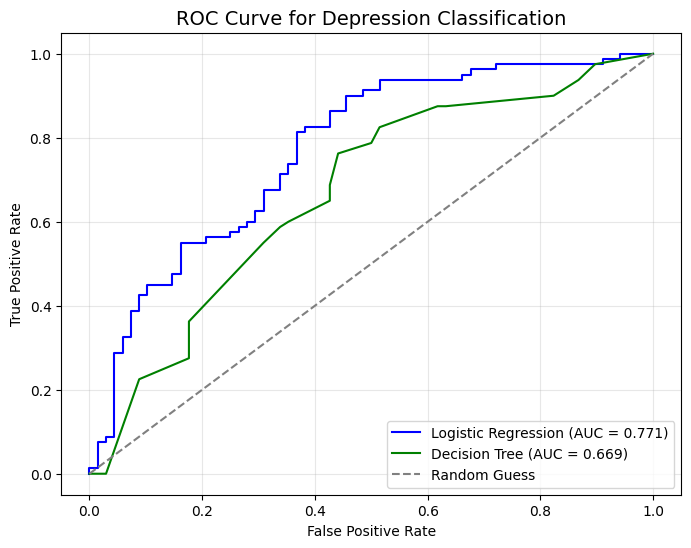

Logistic Regression AUC: 0.7713
Decision Tree AUC: 0.6689


In [ ]:
y_prob_log = log_reg_pipeline.predict_proba(X_test)[:, 1]
y_prob_tree = tree_pipeline.predict_proba(X_test)[:, 1]

# ROC curve values
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

# AUC scores
auc_log = roc_auc_score(y_test, y_prob_log)
auc_tree = roc_auc_score(y_test, y_prob_tree)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})', color='blue')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.3f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.title('ROC Curve for Depression Classification', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Logistic Regression AUC: {auc_log:.4f}")
print(f"Decision Tree AUC: {auc_tree:.4f}")